In [126]:
from scipy.stats import binom, binomtest
import matplotlib.pyplot as plt
import numpy as np
import random as rand

TEST_SEED = 1234
rand.seed(TEST_SEED)

In [137]:
# n and p values
n, p = 20, 0.5

# a place to store the bonom distrubtions
x = np.arange(0, n+1)

# Binomial Distrubtion

In [139]:
binomial_pmf = binom.pmf(x, n, p)
print(binomial_pmf)

[9.53674316e-07 1.90734863e-05 1.81198120e-04 1.08718872e-03
 4.62055206e-03 1.47857666e-02 3.69644165e-02 7.39288330e-02
 1.20134354e-01 1.60179138e-01 1.76197052e-01 1.60179138e-01
 1.20134354e-01 7.39288330e-02 3.69644165e-02 1.47857666e-02
 4.62055206e-03 1.08718872e-03 1.81198120e-04 1.90734863e-05
 9.53674316e-07]


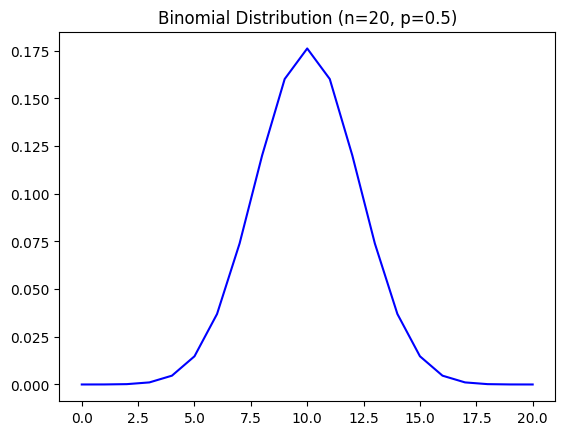

In [140]:
plt.plot(x, binomial_pmf, color='blue')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

In [ ]:
# assign where this agent sits on the distubution
agent_1_binom_index = rand.randint(0, n-1)

# and a number that will decide the success of connection
agent_1_prob = rand.randint(0, 1000) / 1000

In [ ]:
print(agent_1_prob)
print(agent_1_binom_index)

In [ ]:
# check the probability an agent has a connection
# x is the array of binomial distrubutions
# agent_1_binom_index is a randomly assign number between 0 and n-1
# agent_1_prob is a randomly assign number between 0.0 - 1.0

# if the agents probablity(agent_1_prob) falls within the distrubution the agent has a successful connection

x[agent_1_binom_index] < agent_1_prob

# Creating greens Connections

In [176]:
# Green Agent Class
# We must approriatley apply random seeds

class Green_Agent():
    def __init__(self, connection_prob: list):
        self.will_vote = 0.0
        self.not_vote = 0.0
        self.connections = list()
    
    def get_will_vote(self):
        return self.will_vote

    def get_not_vote(self):
        return self.not_vote

    def set_will_vote(self, value: int):
        self.will_vote = value

    def set_not_vote(self, value: int):
        self.not_vote = value

    def calculate_vote_status(self, interval: list):
        return

    def get_prob_value(self) -> int:
        # 1000 is chosen for 3 decimal precsion
        # this may cause precision bugs!.. 
        return rand.randint(0, 100) / 100

    def get_connections(self) -> list:
        return self.connections

    def add_connection(self, conn: int) -> None:
        self.connections.append(conn)

In [177]:
def create_green_agents(num_green: int, connect_prob: list) -> list:
    green_agents = list()

    prob = (connect_prob[0] * connect_prob[1]) / 100
    
    # construct num_green of Green Agents
    for i in range(num_green):
        new_agent = Green_Agent(connect_prob)
        green_agents.append(new_agent)

    
    # Check for connections between green agents
    for i, agent in enumerate(green_agents):

        for j in range(i+1, num_green):

            # When is j less than i we have already checked those connections
            # Thats why we start at  i+1
            
            agent_1_prob = agent.get_prob_value()
            agent_2_prob = green_agents[j].get_prob_value()
            
            # check if agent has a connection
            if (agent_1_prob < prob) and (agent_2_prob < prob):
                agent.add_connection(j)
                green_agents[j].add_connection(i)

    return green_agents


In [200]:
n, p = 50, 0.2

num_green = 30

g_agents = create_green_agents(num_green, [n, p])



In [201]:
for i, agent in enumerate(g_agents):
    adj_list = agent.get_connections()
    print(f"Agent #{i}: ", end="")
    for j in adj_list:
        print(f'{j} ', end="")
    print()

Agent #0: 
Agent #1: 
Agent #2: 
Agent #3: 21 
Agent #4: 7 
Agent #5: 
Agent #6: 
Agent #7: 4 20 
Agent #8: 
Agent #9: 
Agent #10: 
Agent #11: 
Agent #12: 
Agent #13: 
Agent #14: 
Agent #15: 
Agent #16: 
Agent #17: 22 
Agent #18: 
Agent #19: 
Agent #20: 7 
Agent #21: 3 
Agent #22: 17 
Agent #23: 
Agent #24: 
Agent #25: 
Agent #26: 
Agent #27: 
Agent #28: 
Agent #29: 


In [197]:
n * p / 100

0.2